## Computational Methods - Homework 2
### Universidad de Antioquia

**Student:** Andrés Felipe Riaño Quintanilla

**ID:** 1083928808  

Use function "minimize from scipy.optimize" and the method called ‘SLSQP’ to minimize:  the action S.

This task is basically identical to the example from the class. Use the same parameters (t=3.0,m=0.2 n=21) and both functions: xfit() and S().

For more details on the scipy.optimize.minimize read the documentation:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

Please note that the output of this function is different that from the "optimize.fmin_powell" that we did in the class

* here: obj = scipy.optimize.minimize(...)

the output of the process is an object (obj) so to access the information of the minimization you can type:

* print(obj), or print(dir(obj))
* look at the attributes (x, success, status, message, fun)
* then choose the attribute you are interested in, example: 

print(obj.message)

* details on the attributes are here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html#scipy.optimize.OptimizeResult)

* compare by plotting the two minimization routines, the one from the class "optimize.fmin_powell" with "scipy.optimize.minimize"

## Action Function

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
global g
g=9.8

In [2]:
def S(x,t_end=3.,m=0.2,x_ini=0.,x_end=0.):
    '''
    Parameter:
    ----------
    x : numpy array with the heights in meters (for different times) of an object thrown vertically upward.
    t_end (s): time in which the object reaches the final position.
    m (kg): object mass.
    x_ini (m): initial position of the object.
    x_end (m): final position of the object.

    Returns:
    ----------
    The Action of the object along the entire trajectory.
    '''
    x=np.asarray(x)
    x[0]=x_ini
    x[-1]=x_end
    Δt=t_end/(len(x)-1)
    return (((0.5*m*(((x[1:]-x[:-1])/(Δt))**2))-(m*g*0.5*(x[1:]+x[:-1])))*Δt).sum()

## Least Action using optimize.minimize and optimize.fmin_powell

Testing the optimize.minimize function and comparing it with the optimize.fmin_powell function:

In [3]:
x0=np.zeros(21)

om=optimize.minimize(S,x0,method='SLSQP',tol=1E-8)
ofmp=optimize.fmin_powell(S,x0,ftol=1E-8,full_output=1)

Optimization terminated successfully.
         Current function value: -21.554977
         Iterations: 28
         Function evaluations: 5825


In [4]:
#Different output objects.

print(type(om))
print(type(ofmp))

<class 'scipy.optimize.optimize.OptimizeResult'>
<class 'tuple'>


In [5]:
#om attributes.

print(dir(om))

['fun', 'jac', 'message', 'nfev', 'nit', 'njev', 'status', 'success', 'x']


In [6]:
print('Least Action: {} J.s'.format(om.fun))  #Value of objective function (The Least Action).
print('Positions in meters of the object for different times: {}'.format(om.x))  #Positions associated to the Least Action.
print('Did the optimizer exited correctly? {}'.format(om.success))  
print('Termination status of the optimizer: {}'.format(om.status))
print('Cause of the termination: {}'.format(om.message))

Least Action: -21.554977499704314 J.s
Positions in meters of the object for different times: [5.96031577e-16 2.09474610e+00 3.96900363e+00 5.62274566e+00
 7.05599881e+00 8.26874890e+00 9.26099597e+00 1.00327510e+01
 1.05839962e+01 1.09147499e+01 1.10249978e+01 1.09147466e+01
 1.05840008e+01 1.00327457e+01 9.26100032e+00 8.26874695e+00
 7.05599754e+00 5.62275177e+00 3.96899507e+00 2.09475341e+00
 0.00000000e+00]
Did the optimizer exited correctly? True
Termination status of the optimizer: 0
Cause of the termination: Optimization terminated successfully


Implementing the optimize.minimize function in `xfit_minimize`:

In [7]:
def xfit_minimize(n,t_end=3.,m=0.2,x_ini=0.,x_end=0.,ftol=1E-8):
    '''
    Find the array of n (odd) components (heights) that minimizes the action S(x) for an object thrown vertically upward.

    Parameter:
    ----------
    n: odd integer dimension of the ndarray x that minimizes the action S(x,t,m).
    t_end (s): time in which the object reaches the final position.
    m (kg): object mass.
    ftol: number acceptable relative error in S(x) for convergence.
    x_ini (m): initial position of the object.
    x_end (m): final position of the object.
    
    Returns:
    ----------
    x: numpy array with the heights in meters (for different times) for the object that minimizes S(x).
    xmax (m): maximum height for the object.
    Smin (J.s): The Least Action. Number value of function S(x) at minimum. 
    Δt (s): time between height x_i and height x_i+1. 
    '''
    t_end=float(t_end)
    if n%2==0:
        print('x array must be odd')
        sys.exit()
    x0=np.zeros(n)
    om=optimize.minimize(S,x0,args=(t_end,m,x_ini,x_end),method='SLSQP',tol=ftol)
    x=om.x
    x[0]=x_ini; x[-1]=x_end
    xmax=np.sort(x)[-1]
    Smin=om.fun
    Δt=t_end/(len(x)-1)
    return x,xmax,Smin,Δt

Implementing the optimize.fmin_powell function in `xfit`:

In [8]:
def xfit(n,t_end=3.,m=0.2,x_ini=0.,x_end=0.,ftol=1E-8):
    '''
    Find the array of n (odd) components (heights) that minimizes the action S(x) for an object thrown vertically upward.

    Parameter:
    ----------
    n: odd integer dimension of the ndarray x that minimizes the action S(x,t,m).
    t_end (s): time in which the object reaches the final position.
    m (kg): object mass.
    ftol: number acceptable relative error in S(x) for convergence.
    x_ini (m): initial position of the object.
    x_end (m): final position of the object.
    
    Returns:
    ----------
    x: numpy array with the heights in meters (for different times) for the object that minimizes S(x).
    xmax (m): maximum height for the object.
    Smin (J.s): The Least Action. Number value of function S(x) at minimum. 
    Δt (s): time between height x_i and height x_i+1. 
    '''
    t_end=float(t_end)
    if n%2==0:
        print('x array must be odd')
        sys.exit()
    x0=np.zeros(n)
    ofmp=optimize.fmin_powell(S,x0,args=(t_end,m,x_ini,x_end),ftol=ftol,full_output=1)
    x=ofmp[0]
    x[0]=x_ini; x[-1]=x_end
    xmax=np.sort(x)[-1]
    Smin=ofmp[1]
    Δt=t_end/(len(x)-1)
    return x,xmax,Smin,Δt

## optimize.minimize vs optimize.fmin_powell

In [9]:
t_end=3.
m=0.2
ym=xfit_minimize(21,t_end,m); yfmp=xfit(21,t_end,m)
Δt=ym[3]  
tx=np.arange(0,t_end+Δt,Δt)

#Using optimize.minimize.
xm=ym[0]  #Heights (m).
Xm=ym[1]  #Maximum height (m).
Sm=ym[2]  #Least action (J.s).

#Using optimize.fmin_powell
xfmp=yfmp[0]  #Heights (m).
Xfmp=yfmp[1]  #Maximum height (m).
Sfmp=yfmp[2]  #Least action (J.s).

Optimization terminated successfully.
         Current function value: -21.554977
         Iterations: 28
         Function evaluations: 5825


In [10]:
import pandas as pd

Dic={'Maximum height (m)':[Xm,Xfmp],'Least action (J.s)':[Sm,Sfmp]}
Table=pd.DataFrame(Dic).rename(index={0:'minimize',1:'fmin_powell'})
Table

,Maximum height (m),Least action (J.s)
minimize,11.024998,-21.554977
fmin_powell,11.025290,-21.554977


The least action in both cases is the same, but the maximum heights are differents from the third decimal number. The maximum height of fmin_powell is the largest.

**Plotting both solutions**

<function matplotlib.pyplot.show(close=None, block=None)>

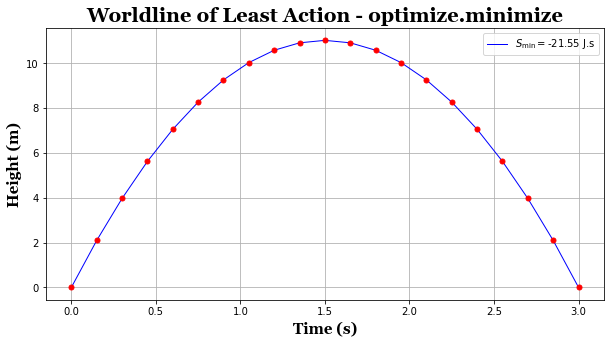

In [11]:
plt.figure(figsize=(10,5))
font1={'family':'Georgia','weight':'bold','size':20}
font2={'family':'Georgia','weight':'bold','size':15}
plt.title('Worldline of Least Action - optimize.minimize',**font1)
plt.plot(tx,xm,label='$S_{\mathrm{min}}=$%.2f J.s' %Sm,linestyle='-',linewidth=1,color='blue')
plt.plot(tx,xm,color='red',marker='o', linestyle='',markersize=5)
plt.xlabel('Time (s)',**font2)
plt.ylabel('Height (m)',**font2)
plt.legend()
plt.grid()
plt.show

Polynomial corresponding to xm(t):

In [12]:
Pm=np.poly1d(np.polyfit(tx,xm,2),variable='t')
print(Pm)

      2
-4.9 t + 14.7 t - 4.977e-07


<function matplotlib.pyplot.show(close=None, block=None)>

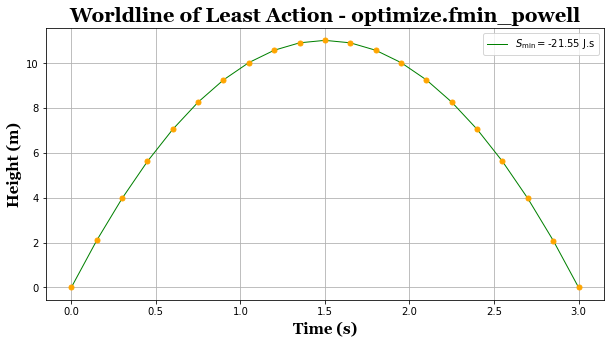

In [13]:
plt.figure(figsize=(10,5))
font1={'family':'Georgia','weight':'bold','size':20}
font2={'family':'Georgia','weight':'bold','size':15}
plt.title('Worldline of Least Action - optimize.fmin_powell',**font1)
plt.plot(tx,xfmp,label='$S_{\mathrm{min}}=$%.2f J.s' %Sfmp,linestyle='-',linewidth=1,color='green')
plt.plot(tx,xfmp,color='orange',marker='o', linestyle='',markersize=5)
plt.xlabel('Time (s)',**font2)
plt.ylabel('Height (m)',**font2)
plt.legend()
plt.grid()
plt.show

Polynomial corresponding to xfmp(t):

In [14]:
Pfmp=np.poly1d(np.polyfit(tx,xfmp,2),variable='t')
print(Pfmp)

      2
-4.9 t + 14.7 t + 0.0001604


If we plot both curved lines, we will not notice the difference:

<function matplotlib.pyplot.show(close=None, block=None)>

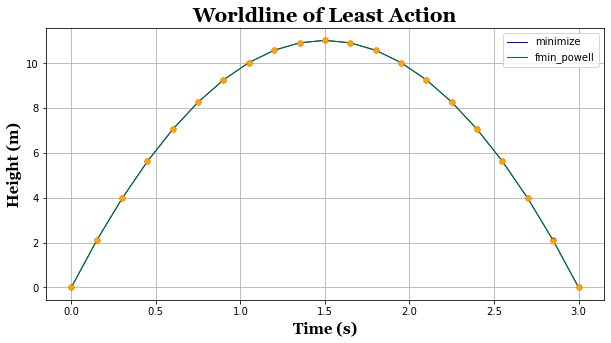

In [15]:
plt.figure(figsize=(10,5))
font1={'family':'Georgia','weight':'bold','size':20}
font2={'family':'Georgia','weight':'bold','size':15}
plt.title('Worldline of Least Action',**font1)
plt.plot(tx,xm,label='minimize',linestyle='-',linewidth=1,color='blue')
plt.plot(tx,xm,color='red',marker='o', linestyle='',markersize=5)
plt.plot(tx,xfmp,label='fmin_powell',linestyle='-',linewidth=1,color='green')
plt.plot(tx,xfmp,color='orange',marker='o', linestyle='',markersize=5)
plt.xlabel('Time (s)',**font2)
plt.ylabel('Height (m)',**font2)
plt.legend()
plt.grid()
plt.show

But, zooming in enough, we can see the difference:

<function matplotlib.pyplot.show(close=None, block=None)>

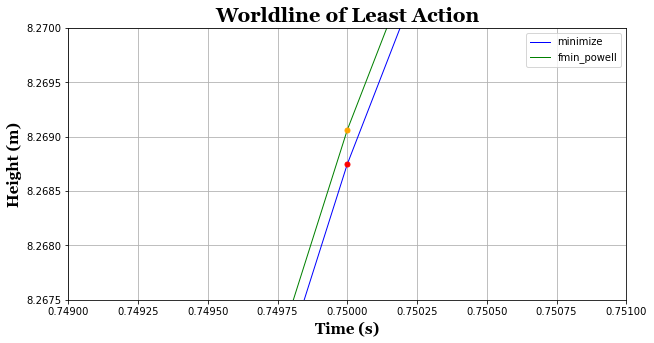

In [16]:
plt.figure(figsize=(10,5))
font1={'family':'Georgia','weight':'bold','size':20}
font2={'family':'Georgia','weight':'bold','size':15}
plt.title('Worldline of Least Action',**font1)
plt.plot(tx,xm,label='minimize',linestyle='-',linewidth=1,color='blue')
plt.plot(tx,xm,color='red',marker='o', linestyle='',markersize=5)
plt.plot(tx,xfmp,label='fmin_powell',linestyle='-',linewidth=1,color='green')
plt.plot(tx,xfmp,color='orange',marker='o', linestyle='',markersize=5)
plt.xlabel('Time (s)',**font2)
plt.ylabel('Height (m)',**font2)
plt.xlim([0.749,0.751])
plt.ylim([8.2675,8.27])
plt.legend()
plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

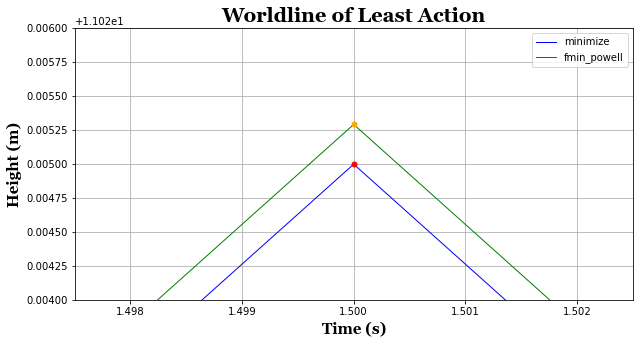

In [17]:
plt.figure(figsize=(10,5))
font1={'family':'Georgia','weight':'bold','size':20}
font2={'family':'Georgia','weight':'bold','size':15}
plt.title('Worldline of Least Action',**font1)
plt.plot(tx,xm,label='minimize',linestyle='-',linewidth=1,color='blue')
plt.plot(tx,xm,color='red',marker='o', linestyle='',markersize=5)
plt.plot(tx,xfmp,label='fmin_powell',linestyle='-',linewidth=1,color='green')
plt.plot(tx,xfmp,color='orange',marker='o', linestyle='',markersize=5)
plt.xlabel('Time (s)',**font2)
plt.ylabel('Height (m)',**font2)
plt.xlim([1.4975,1.5025])
plt.ylim([11.024,11.026])
plt.legend()
plt.grid()
plt.show

It seems that the curved line of fmin_powell is above the curved line of minimize. Let's check if this is true:

In [18]:
xfmp>xm

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False])

The curved line of optimize.fmin_powell is above the curved line of optimize.minimize only at some points.

Now, let's compare the polynomials with the equation of motion:

$$x(t)=-\frac{{1}}{{2}}gt^2+v_0t$$

$$Pm(t)=-4.9t^2+14.7t-4.977 \times 10^{-7}$$

$$Pfmp(t)=-4.9t^2+14.7t+0.0001604$$

$Pm(t)$ looks more like $x(t)$ than $Pfmp(t)$, because its constant term is practically zero.